Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

Config

In [2]:
DATASET_PATH = r'C:\Users\aishu\Desktop\Apziva_projects\YCcsS7tcA1kghT1E\Dataset\term-deposit-marketing-2020.csv'
bool_mapping = {'yes': 1, 'no': 0}
month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
education_order = ['primary', 'secondary', 'tertiary', 'unknown']

Dataset

In [3]:
dataset = pd.read_csv(DATASET_PATH)
# X = dataset.drop('y', axis=1)
# y = dataset['y']

Data Overview

In [4]:
print('Dataset Information')
display(dataset.info())

print('Dataset Stats')
display(dataset.describe())

null_table = pd.DataFrame({
    'Null Values': dataset.isnull().sum(),
    'NA Values': dataset.isna().sum()
})

print(null_table)

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  object
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


None

Dataset Stats


,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,1274.277550,16.017225,254.824300,2.882175
std,2903.769716,8.278127,259.366498,3.239051
min,-8019.000000,1.000000,0.000000,1.000000
25%,54.000000,8.000000,100.000000,1.000000
50%,407.000000,17.000000,175.000000,2.000000
75%,1319.000000,21.000000,313.000000,3.000000
max,102127.000000,31.000000,4918.000000,63.000000


           Null Values  NA Values
age                  0          0
job                  0          0
marital              0          0
education            0          0
default              0          0
balance              0          0
housing              0          0
loan                 0          0
contact              0          0
day                  0          0
month                0          0
duration             0          0
campaign             0          0
y                    0          0


Changing data types of attributes 

In [5]:
print('Dataset before datatype conversion:')
display(dataset.tail())
dataset.drop(dataset.tail(1).index, inplace=True)

# Conver Age to int values
dataset['age'] = pd.to_numeric(dataset['age'].str.strip(), errors='raise')

# Convert Categorical values
dataset[['job', 'marital', 'education', 'contact', 'month']]= dataset[['job', 'marital', 'education', 'contact', 'month']].apply(lambda x: x.str.strip().str.lower().astype('category'))

# Convert Boolean Values
dataset[['default', 'housing', 'loan', 'y']] = dataset[['default', 'housing', 'loan', 'y']].apply(lambda x: x.str.strip().str.lower().map(bool_mapping).astype('int'))

# Move 'y' to the last column
cols = [c for c in dataset.columns if c != 'y'] + ['y']
dataset = dataset[cols]

print('Dataset after datatype conversion:')
display(dataset.tail())
print('Dataset information: ')
display(dataset.info())

# Save dataset
# dataset.to_csv(r'C:\Users\aishu\Desktop\Apziva_projects\YCcsS7tcA1kghT1E\Dataset\encoded_dataset')


Dataset before datatype conversion:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no
39999,X,technician,married,secondary,no,1442,yes,no,cellular,3,jun,113,1,no


Dataset after datatype conversion:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
39994,35,management,married,tertiary,0,3109,1,0,cellular,3,jun,467,1,0
39995,53,technician,married,tertiary,0,395,0,0,cellular,3,jun,107,1,0
39996,30,management,single,tertiary,0,3340,0,0,cellular,3,jun,238,3,1
39997,54,admin,divorced,secondary,0,200,0,0,cellular,3,jun,170,1,1
39998,34,management,married,tertiary,0,1047,0,0,cellular,3,jun,342,1,0


Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39999 entries, 0 to 39998
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        39999 non-null  int64   
 1   job        39999 non-null  category
 2   marital    39999 non-null  category
 3   education  39999 non-null  category
 4   default    39999 non-null  int32   
 5   balance    39999 non-null  int64   
 6   housing    39999 non-null  int32   
 7   loan       39999 non-null  int32   
 8   contact    39999 non-null  category
 9   day        39999 non-null  int64   
 10  month      39999 non-null  category
 11  duration   39999 non-null  int64   
 12  campaign   39999 non-null  int64   
 13  y          39999 non-null  int32   
dtypes: category(5), int32(4), int64(5)
memory usage: 2.3 MB


None

Verifying unrepeated categories after data type changing

In [6]:
for col in dataset.select_dtypes(include=['category']).columns:
    print(f"\nColumn: {col}")
    print(dataset[col].unique().tolist())
    print(f"Number of categories: {dataset[col].nunique()}")


Column: job
['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin', 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Number of categories: 12

Column: marital
['married', 'single', 'divorced']
Number of categories: 3

Column: education
['tertiary', 'secondary', 'unknown', 'primary']
Number of categories: 4

Column: contact
['unknown', 'cellular', 'telephone']
Number of categories: 3

Column: month
['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr']
Number of categories: 11


Check class distribution

Target Distribution
0    37103
1     2896
Name: y, dtype: int64
Target Distribution Normalized 
0    0.927598
1    0.072402
Name: y, dtype: float64


<Axes: title={'center': 'Target Variable Distribution'}, xlabel='Y', ylabel='Distribution'>

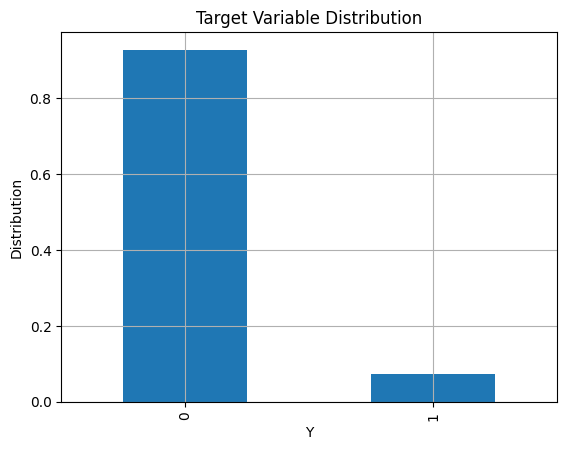

In [7]:
print('Target Distribution')
print(dataset['y'].value_counts())
print('Target Distribution Normalized ')
print(dataset['y'].value_counts(normalize=True))
dataset['y'].value_counts(normalize=True).plot(kind='bar', title='Target Variable Distribution', grid=True, xlabel='Y', ylabel='Distribution')

Univariate Analysis

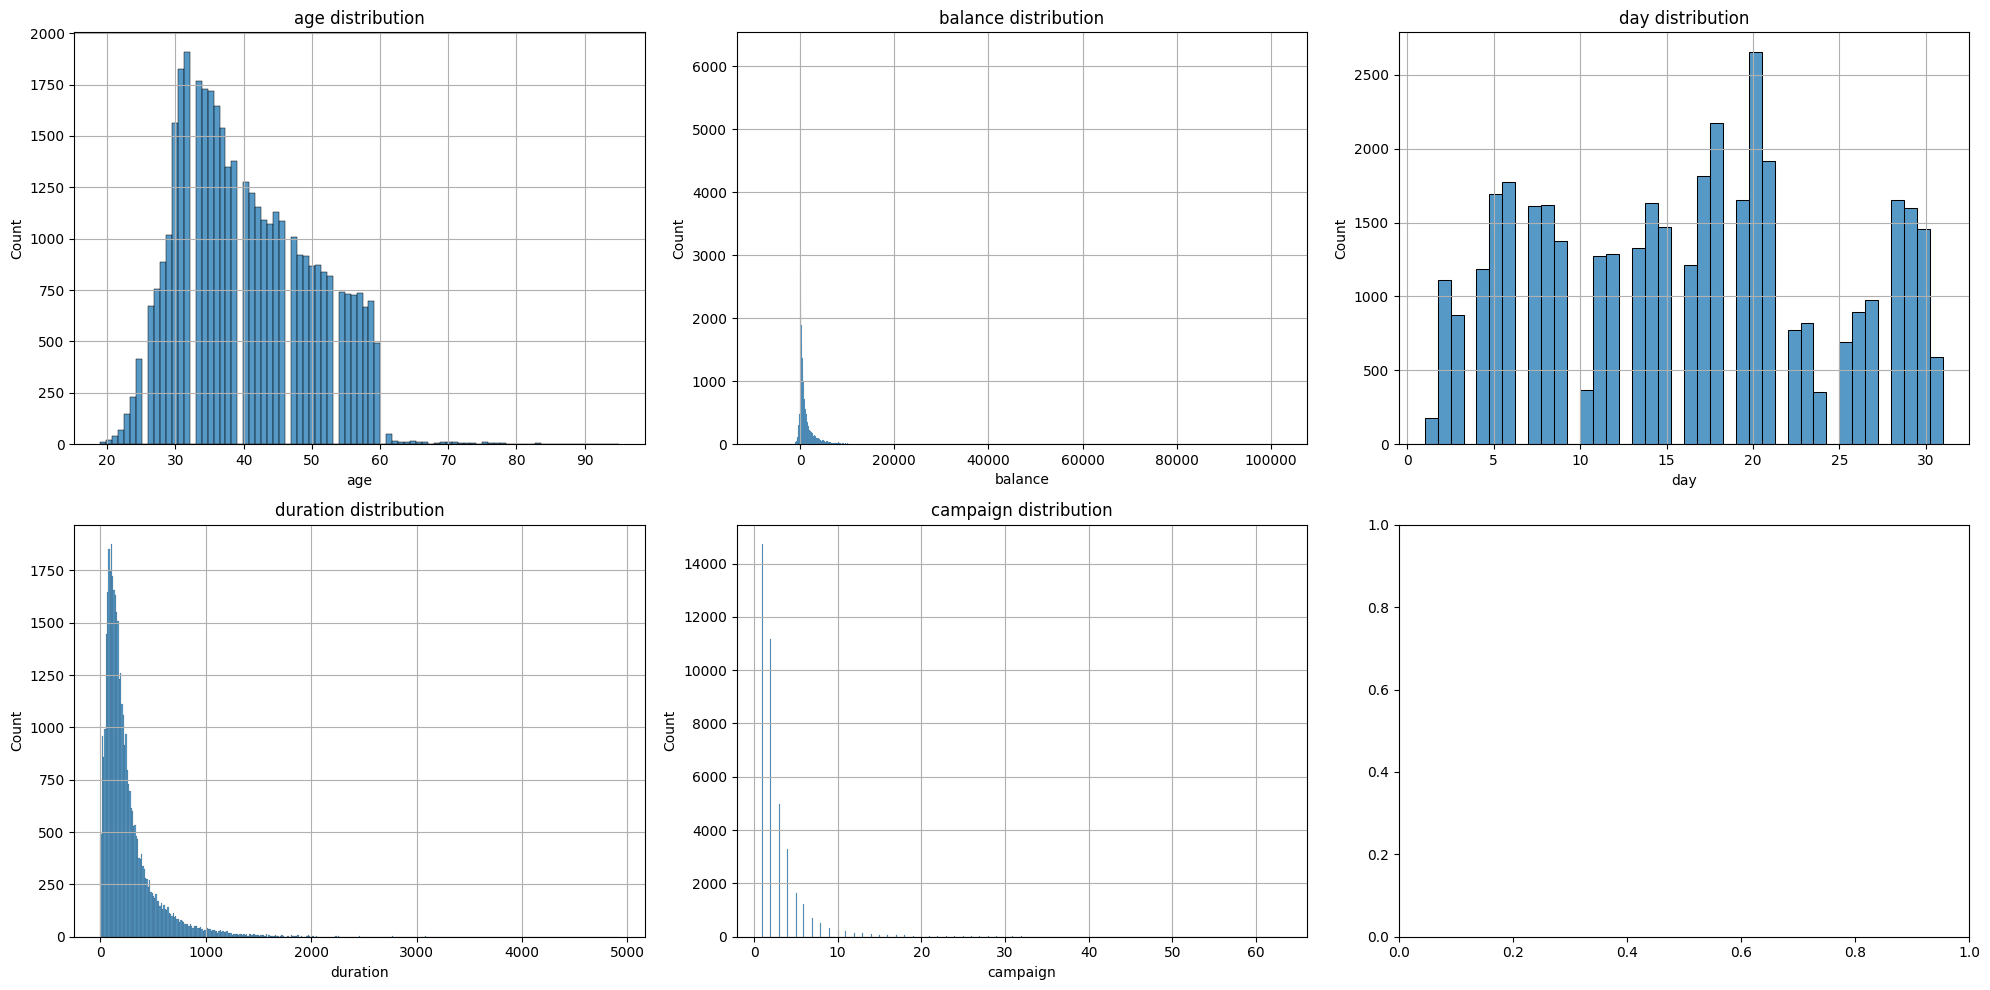

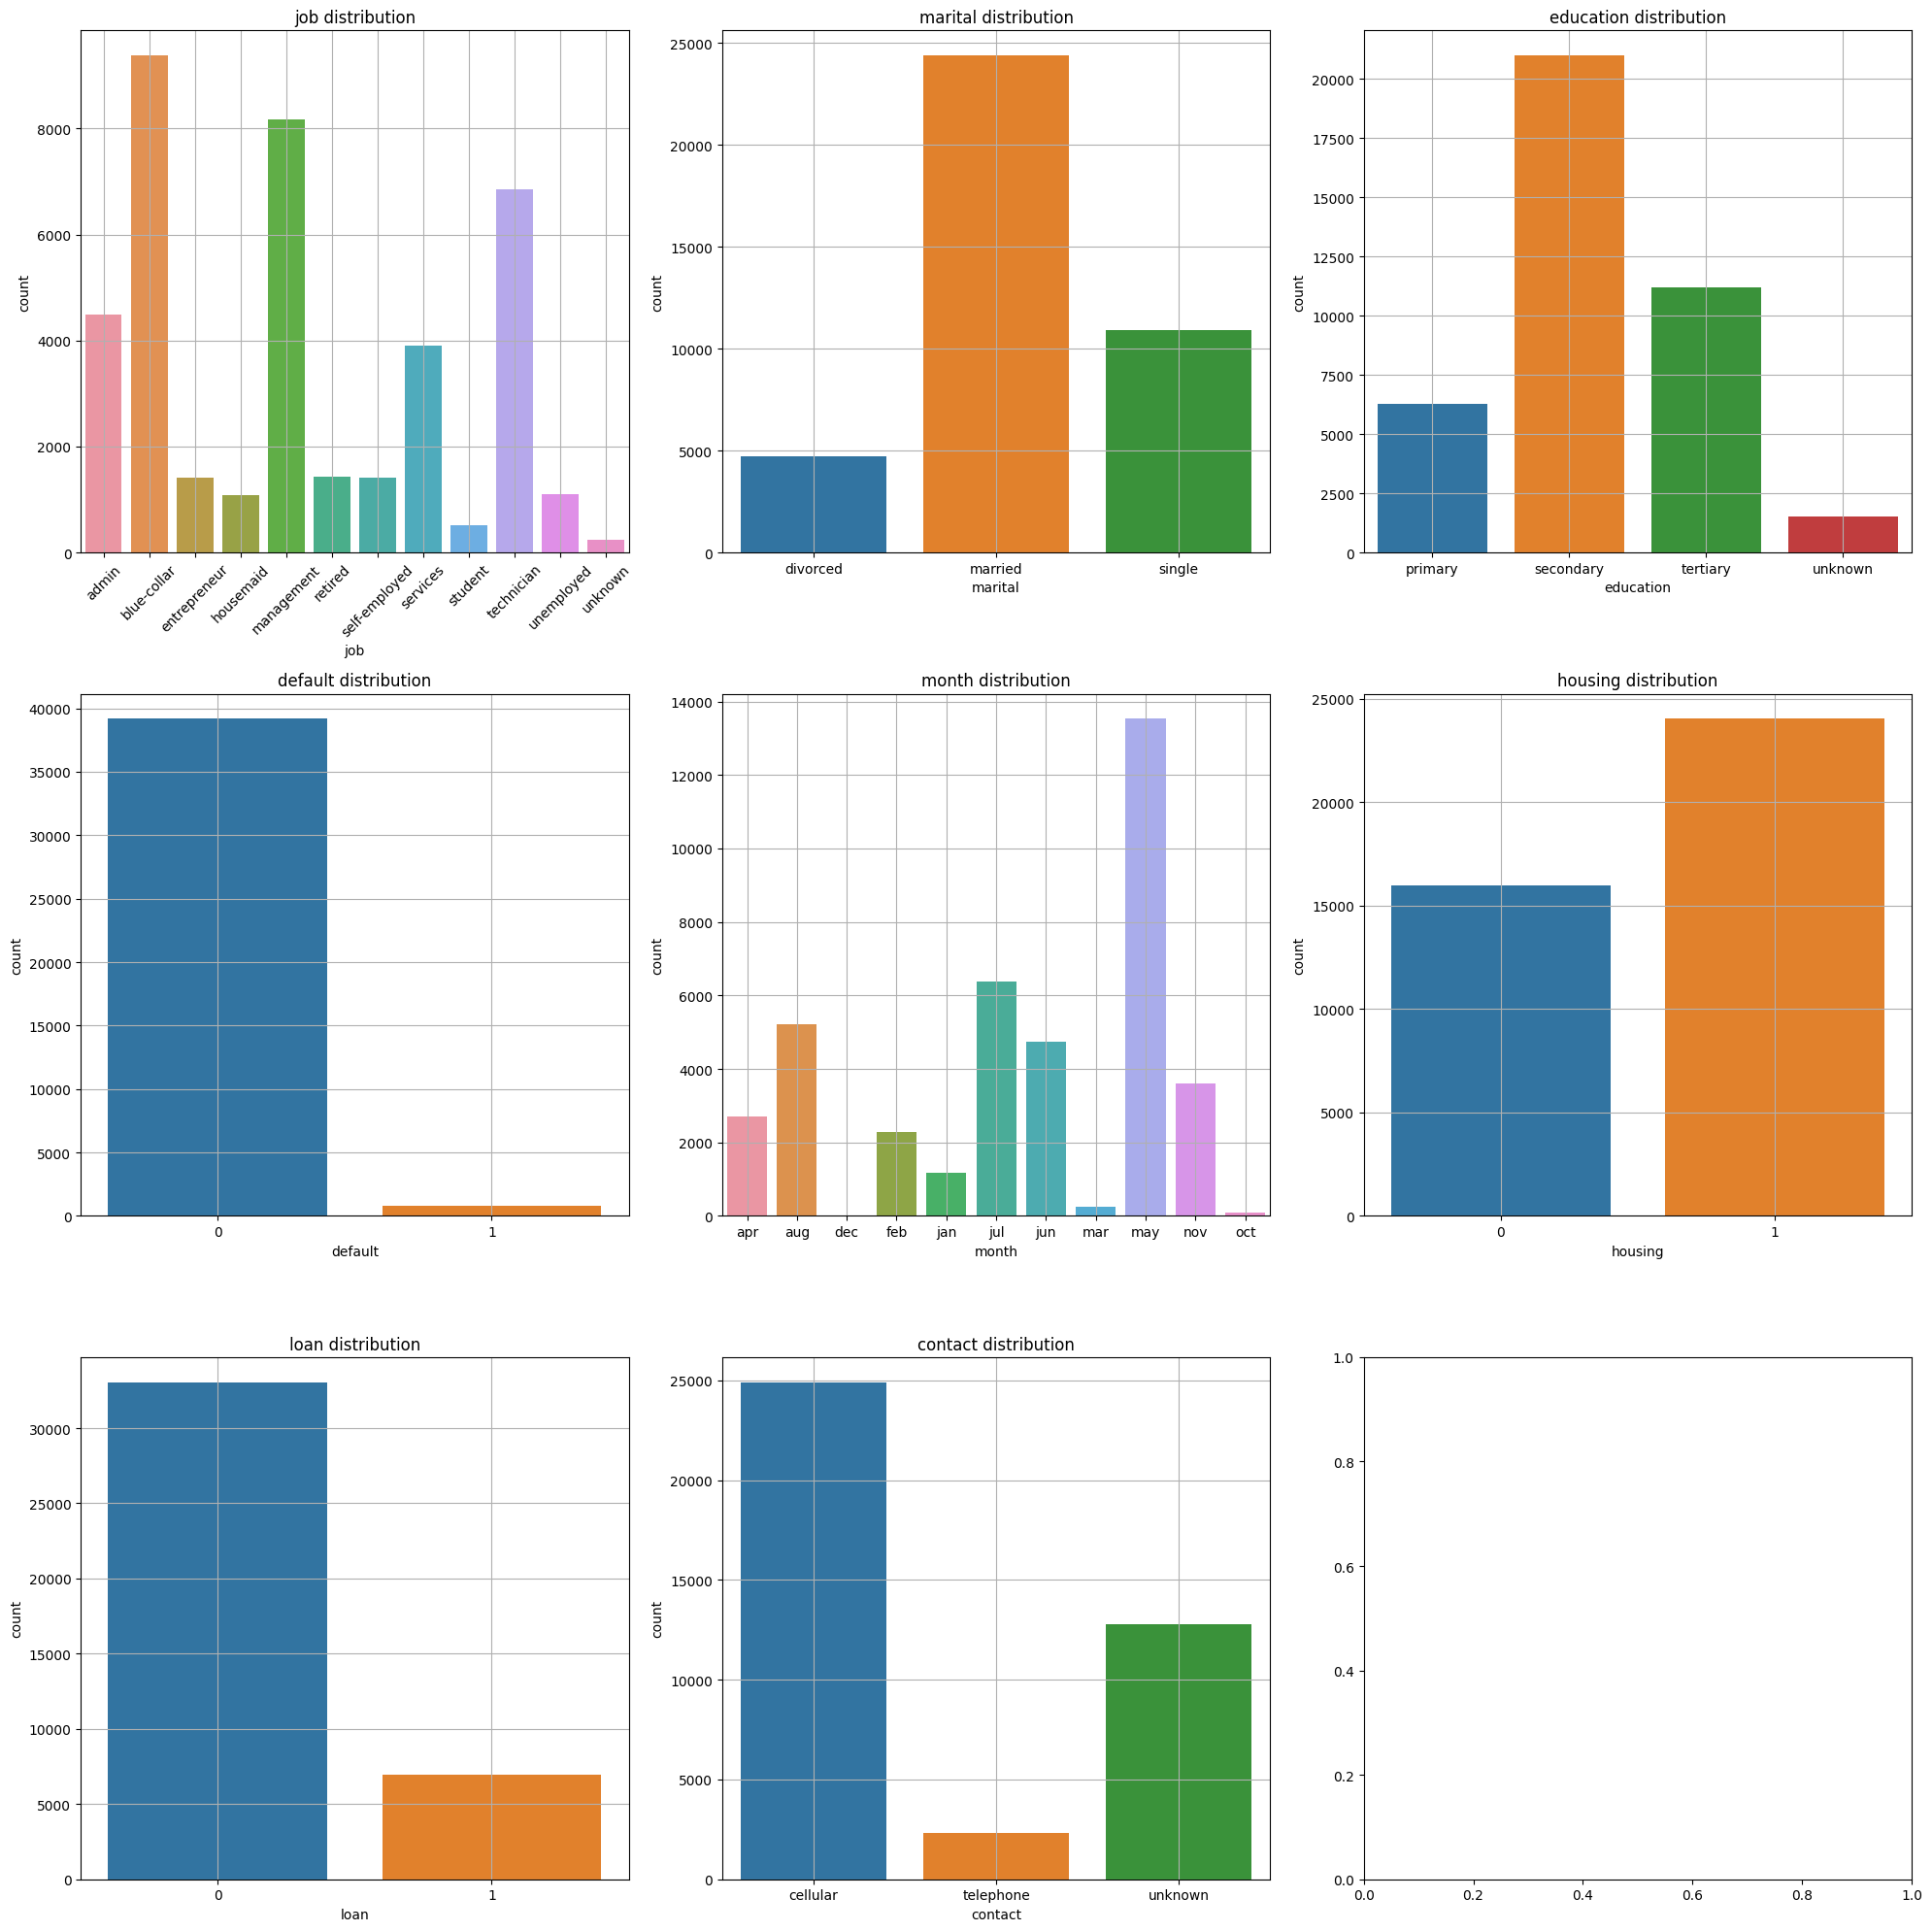

In [8]:
fig, axes = plt.subplots(2,3, figsize = (20,10))
axes = axes.flatten()

for i, col in enumerate(['age','balance','day','duration','campaign']):
    sns.histplot(dataset[col], ax=axes[i])
    axes[i].set_title(f'{col} distribution')
    axes[i].grid()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(3,3, figsize = (20,20))
axes = axes.flatten()

for i, col in enumerate(['job','marital','education', 'default', 'month', 'housing', 'loan', 'contact']):
    sns.countplot(data=dataset, x=col, ax=axes[i])
    axes[i].set_title(f'{col} distribution')
    axes[i].grid()

axes[0].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Bivariate Analysis

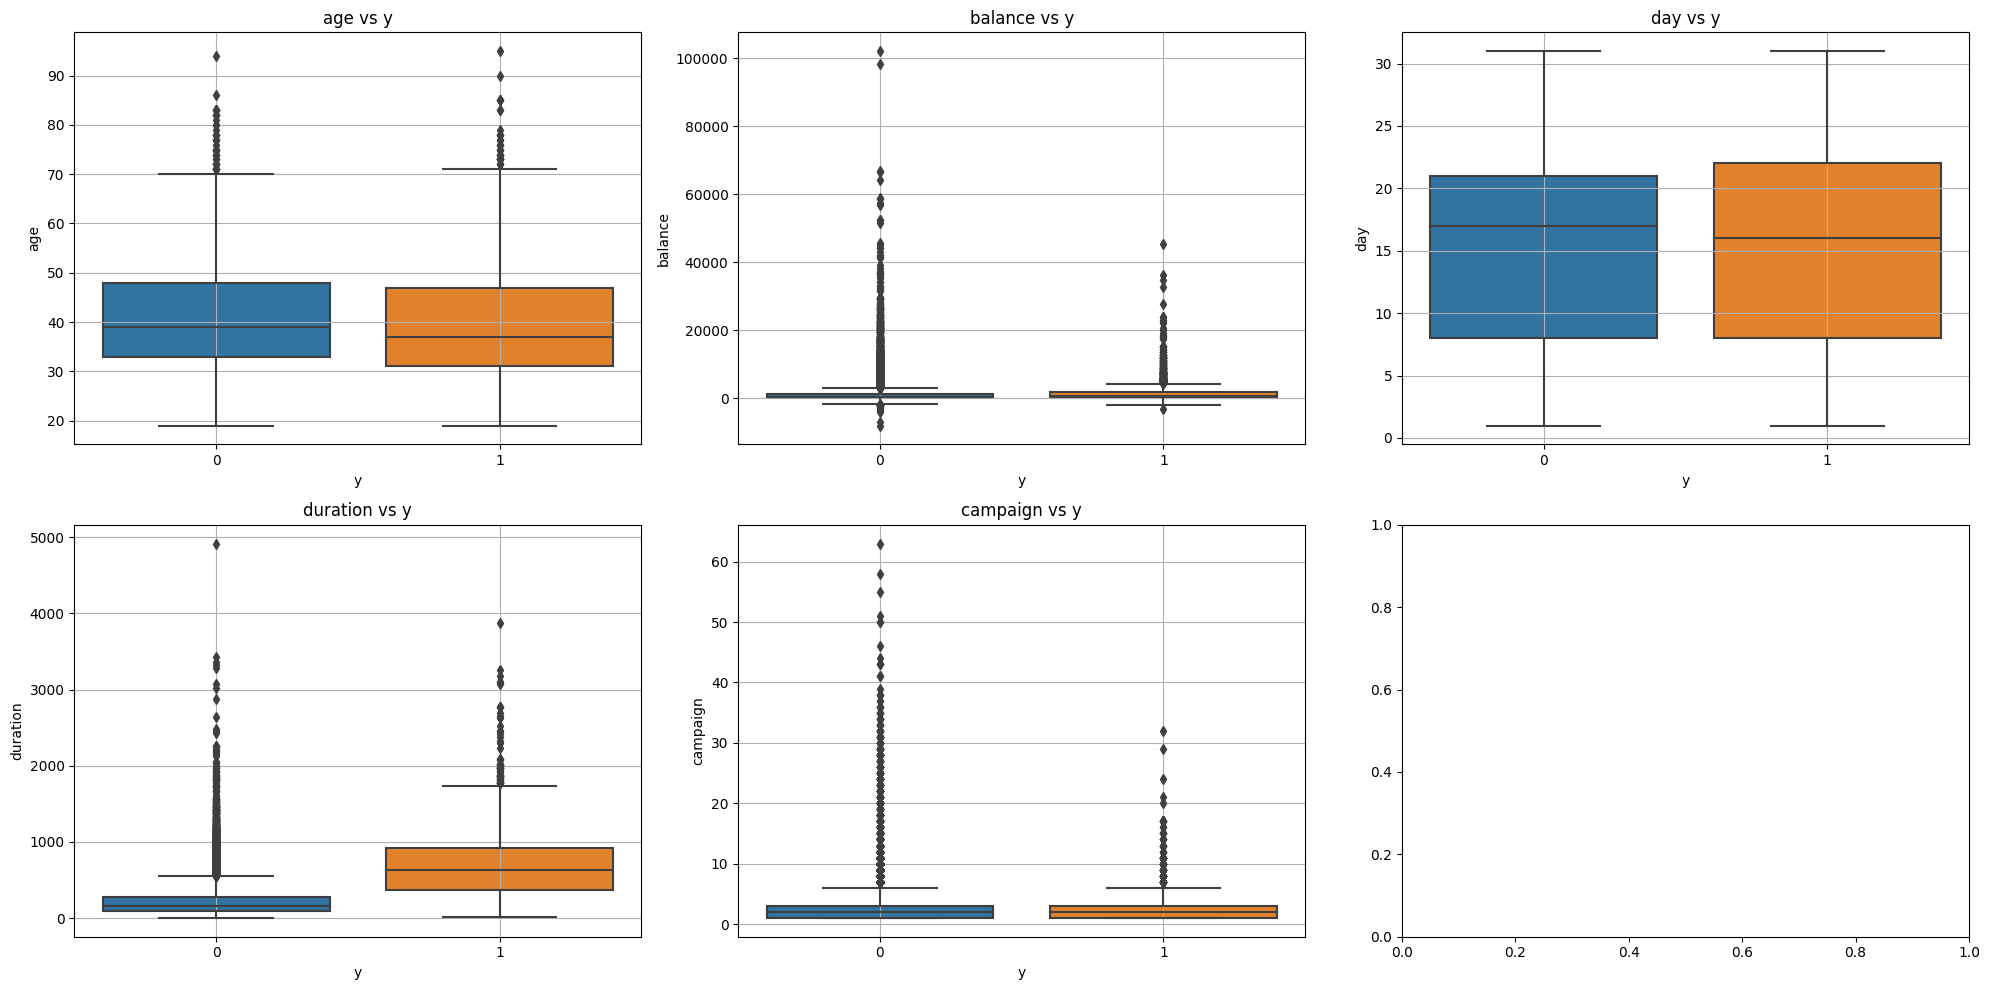

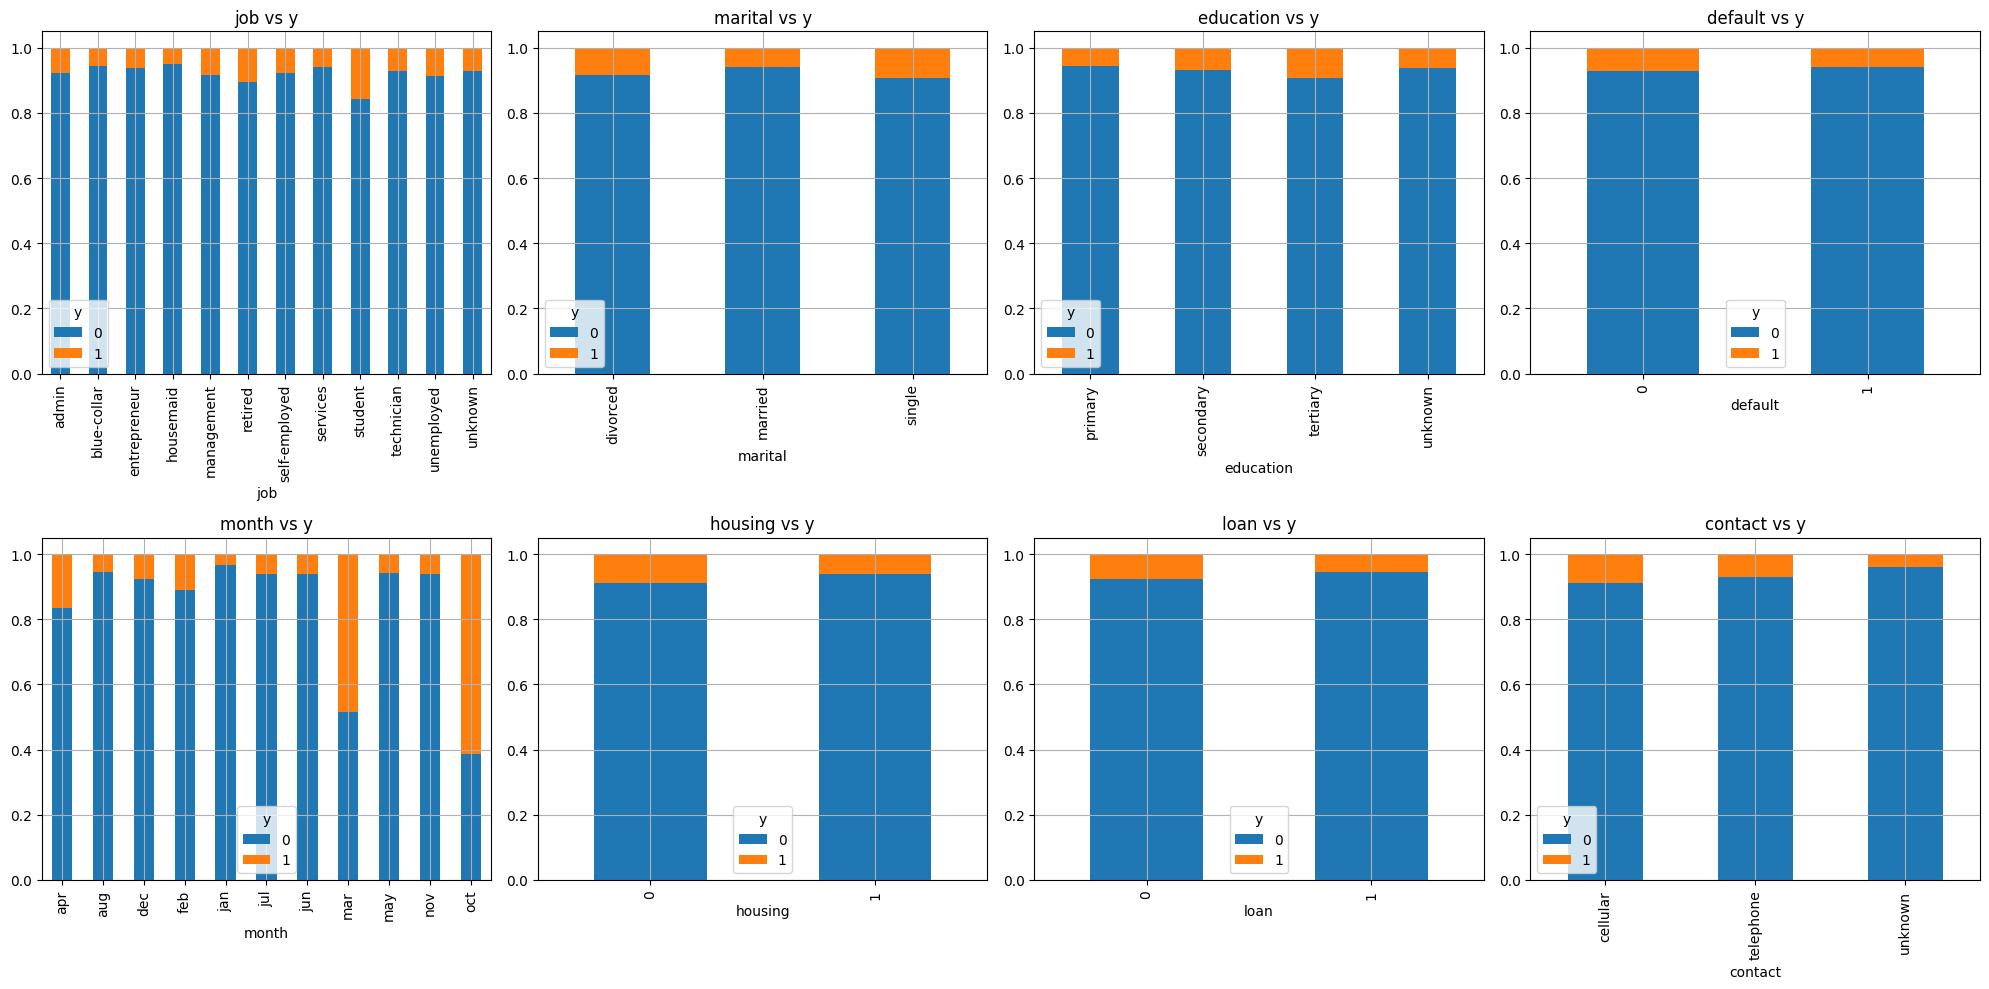

In [9]:
fig, axes = plt.subplots(2,3, figsize = (20,10))
axes = axes.flatten()

for i, col in enumerate(['age','balance','day','duration','campaign']):
    sns.boxplot(data=dataset, x='y', y=col, ax=axes[i])
    axes[i].set_title(f'{col} vs y')
    axes[i].grid()
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2,4, figsize = (20,10))
axes = axes.flatten()

for i, col in enumerate(['job','marital','education', 'default', 'month', 'housing', 'loan', 'contact']):
    pd.crosstab(dataset[col], dataset['y'], normalize='index').plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{col} vs y')
    axes[i].grid()

plt.tight_layout()
plt.show()



Correlation heatmap

C:\Users\aishu\AppData\Local\Temp\ipykernel_28680\4040098677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


Text(0.5, 1.0, 'Correlation Heatmap of All Features')

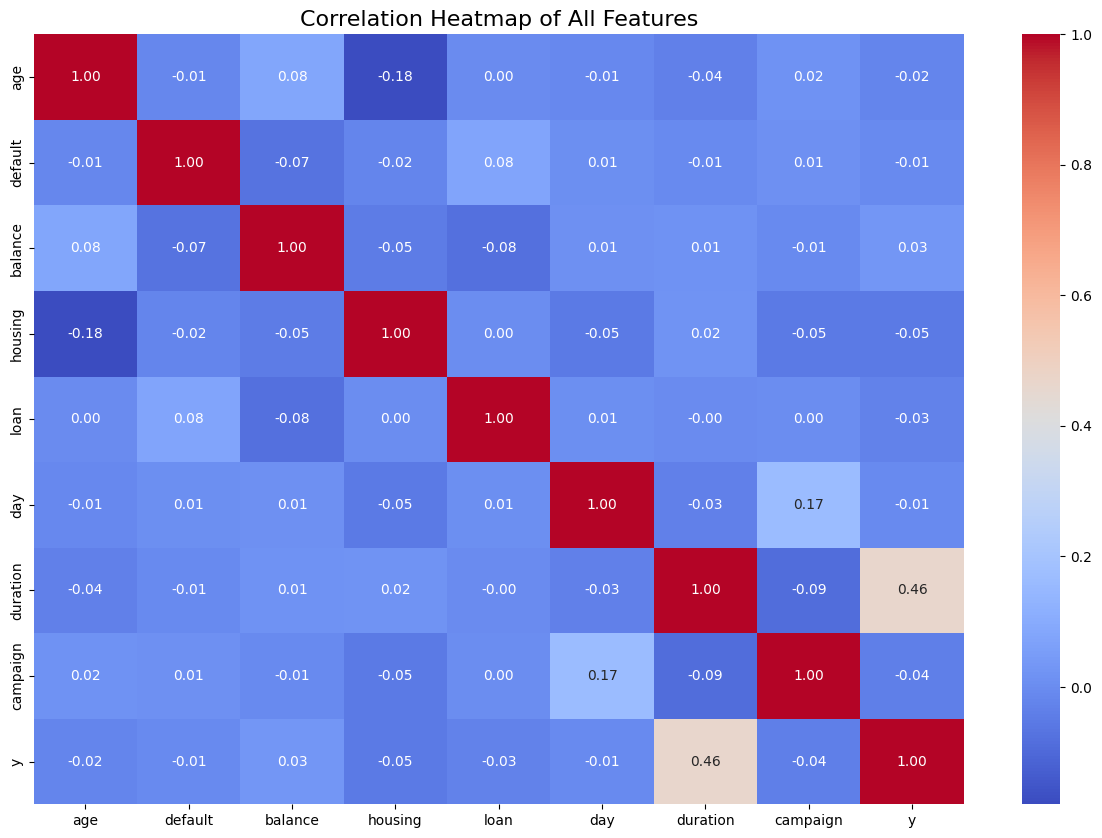

In [10]:
plt.figure(figsize=(15,10))
corr = dataset.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of All Features", fontsize=16)

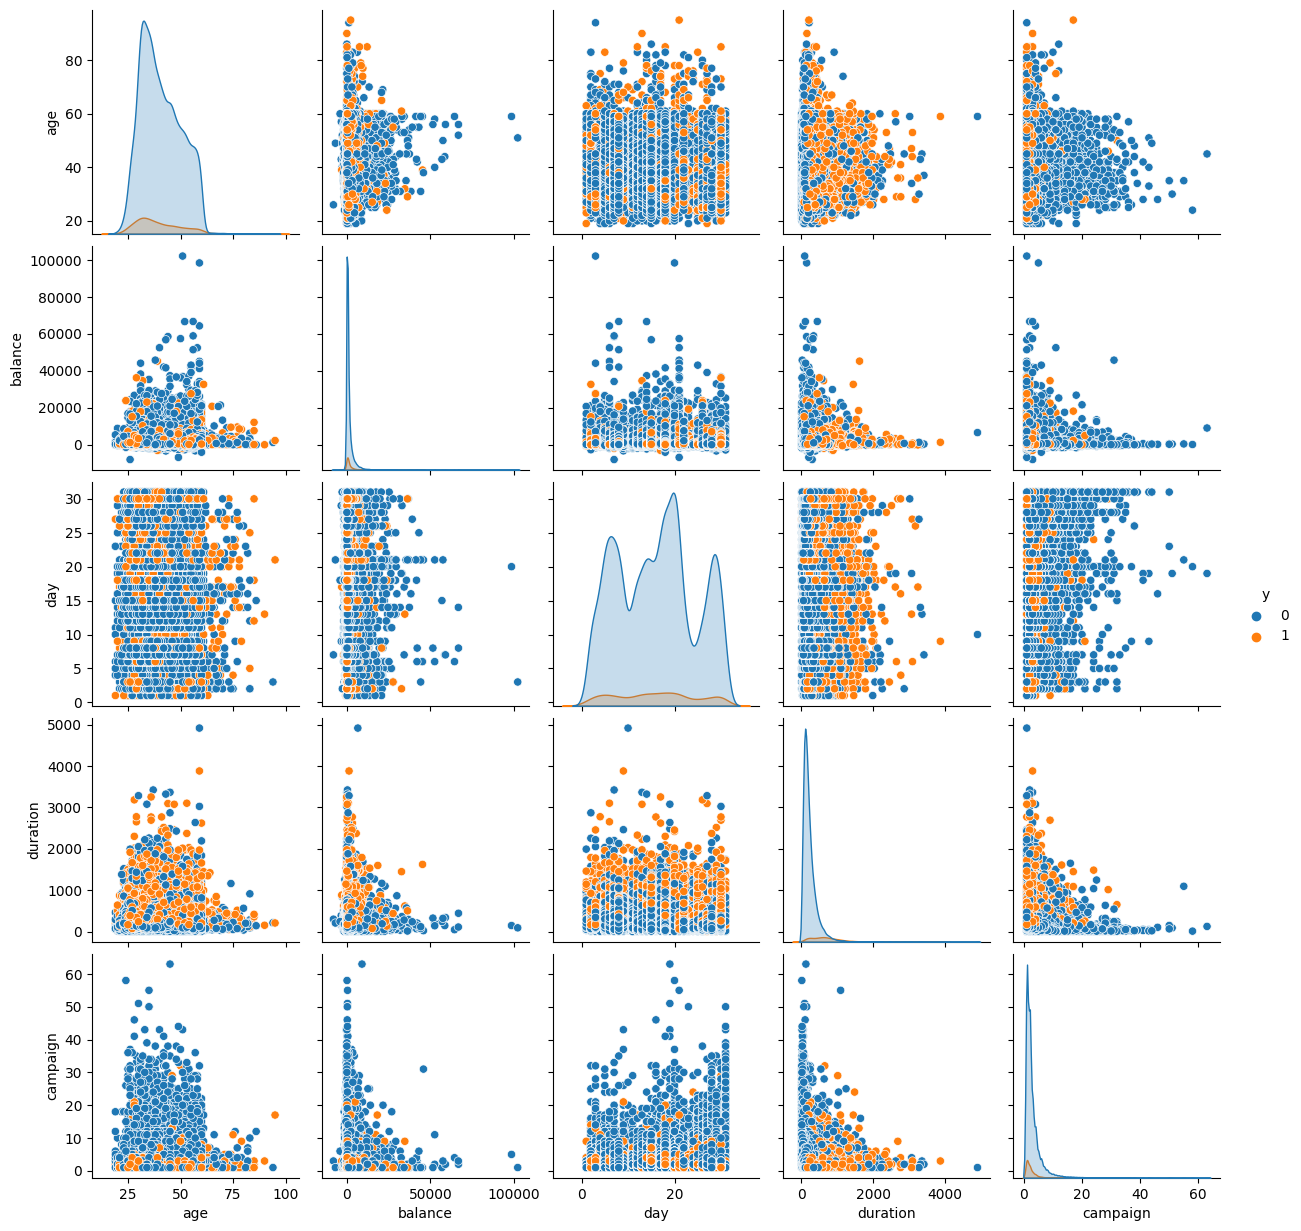

In [11]:
sns.pairplot(dataset, vars=['age','balance','day','duration','campaign'], hue='y', kind='scatter')
# sns.pairplot(dataset, vars=dataset.columns.drop('y'), hue='y', kind='scatter')